## Project: Data Analysis on Uber and Lyft Dataset Boston, MA

* Submission by: Prajwal Kusha                                         

# Ask 1 – Search for a Dataset

For the project, we explore a dataset about **Uber and Lyft rides within the metro Boston area**. The dataset contains information about **693,071 rides** that took place in Boston between November 26th, 2018, and December 18th, 2018. It includes 57 variables, including information such as ride type, ride distance, ride price, and the weather at the time of the ride. **The dataset is 367.38 MB.**

To prepare the data for analysis, we plan to use **csvkit** to remove unnecessary columns and create a new dataset for the project.
You can download the dataset in CSV format and find additional information about each field at the Kaggle page [here](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data).

### Dataset Source

The dataset is from **Kaggle**, and was uploaded to the site by a user named Bikram Maharjan, a data science masters student. Bikram’s Kaggle profile can be accessed [here](https://www.kaggle.com/brllrb). 

### Why This Dataset?

There are several reasons why we chose this dataset:
1) **Rich Data for Analysis:** This data includes intriguing variables such as ride distances, weather, times, pickup and drop-off neighborhoods, and fare amounts, offering ample opportunities for data analysis. 
2) **Data Quality:** This dataset offers well-defined data descriptions and appropriate dimensions for analysis, making it an ideal candidate for dimensional modeling.

### Is This Dataset Suitable for Dimensional Modeling and Analytical Analysis?
    
Yes, this dataset contains well-defined numerical fields that are suitable for creating fact tables, as well as various categorical attributes that can serve as dimension tables. Furthermore, several attributes (such as weather and ride type) can be leveraged to generate derived attributes. Additionally, the dataset offers numerous intriguing analytical questions to investigate. The relationship between different variables and price will be a key focus for our analysis.

    
### Analytical Questions we can answer with this Data

1) Which locations could benefit from an increased amount of drivers to capture all ridership demand and at what hours is this increased supply of drivers most needed?
2) What is the most popular ride type (e.g., luxury, shared, etc.) in each specific location, and how can this insight be used to design targeted promotion strategies?
3) Which cab type service (e.g., Lyft or Uber) offers the highest costs for riders and the greatest earning potential for drivers across different locations and how does this affect the number of rides?

### Concerns with the Data and Expected Changes
1) **Large Dataset:** The dataset contains over 690,000 rows, which could result in slower processing times for analysis.
2) **Extraneous Attributes:** We will filter out attributes that are not relevant to our analytical questions.




### Step 1: Creating Star Schema and defining the Fact and Dimension Tables

### Overview
This data warehouse schema is designed to support analytics for ride-sharing platforms. It uses a **star schema** structure, optimized for querying and reporting.

### Schema Components

### Fact Table: `fact_rides`
The `fact_rides` table contains the core metrics for ride-sharing events:
- `id`: Unique identifier for each ride.
- `price`: Cost of the ride.
- `distance`: Distance traveled during the ride.
- `surge_multiplier`: Surge pricing applied to the ride.
- Foreign keys:
  - `dim_time_id`: Links to the time dimension.
  - `dim_location_id`: Links to the location dimension.
  - `dim_cab_id`: Links to the ride type dimension.
  - `dim_weather_id`: Links to the weather dimension.

### Dimension Tables

#### 1. `dim_time`
Stores temporal information to analyze trends across different time periods:
- `id`: Unique identifier for each timestamp.
- `timestamp`: Full timestamp of the ride.
- `hour`: Hour of the day.
- `day`: Day of the month.
- `month`: Month of the year.
- `year`: Year.

#### 2. `dim_location`
Represents ride source and destination details:
- `id`: Unique identifier combining `source` and `destination`.
- `source`: Starting location.
- `destination`: Ending location.

#### 3. `dim_ride_type`
Categorizes the ride type and cab service:
- `id`: Unique identifier combining `cab_type` and `name`.
- `cab_type`: Type of service (e.g., Uber, Lyft).
- `name`: Specific category of ride (e.g., UberX, UberPool).

#### 4. `dim_weather`
Provides weather information for the ride:
- `id`: Composite identifier (`temperature-apparent_temperature-short_summary`).
- Attributes:
  - `temperature`: Recorded temperature during the ride.
  - `apparent_temperature`: Perceived temperature.
  - `short_summary`: Short weather description (e.g., Clear, Rain).
  - `percip_intensity`: Intensity of precipitation.
  - `percip_probability`: Probability of precipitation.
  - `humidity`: Humidity level.
  - `visibility`: Visibility during the ride.
  - `wind_speed`: Wind speed.

---

## Use Cases
- **Trend Analysis**: Study pricing patterns based on time, weather, and location.
- **Performance Metrics**: Evaluate ride types and their impact on revenue.
- **Weather Impact**: Understand how weather conditions influence ride demand and pricing.
- **Location Insights**: Analyze popular routes and locations.

---

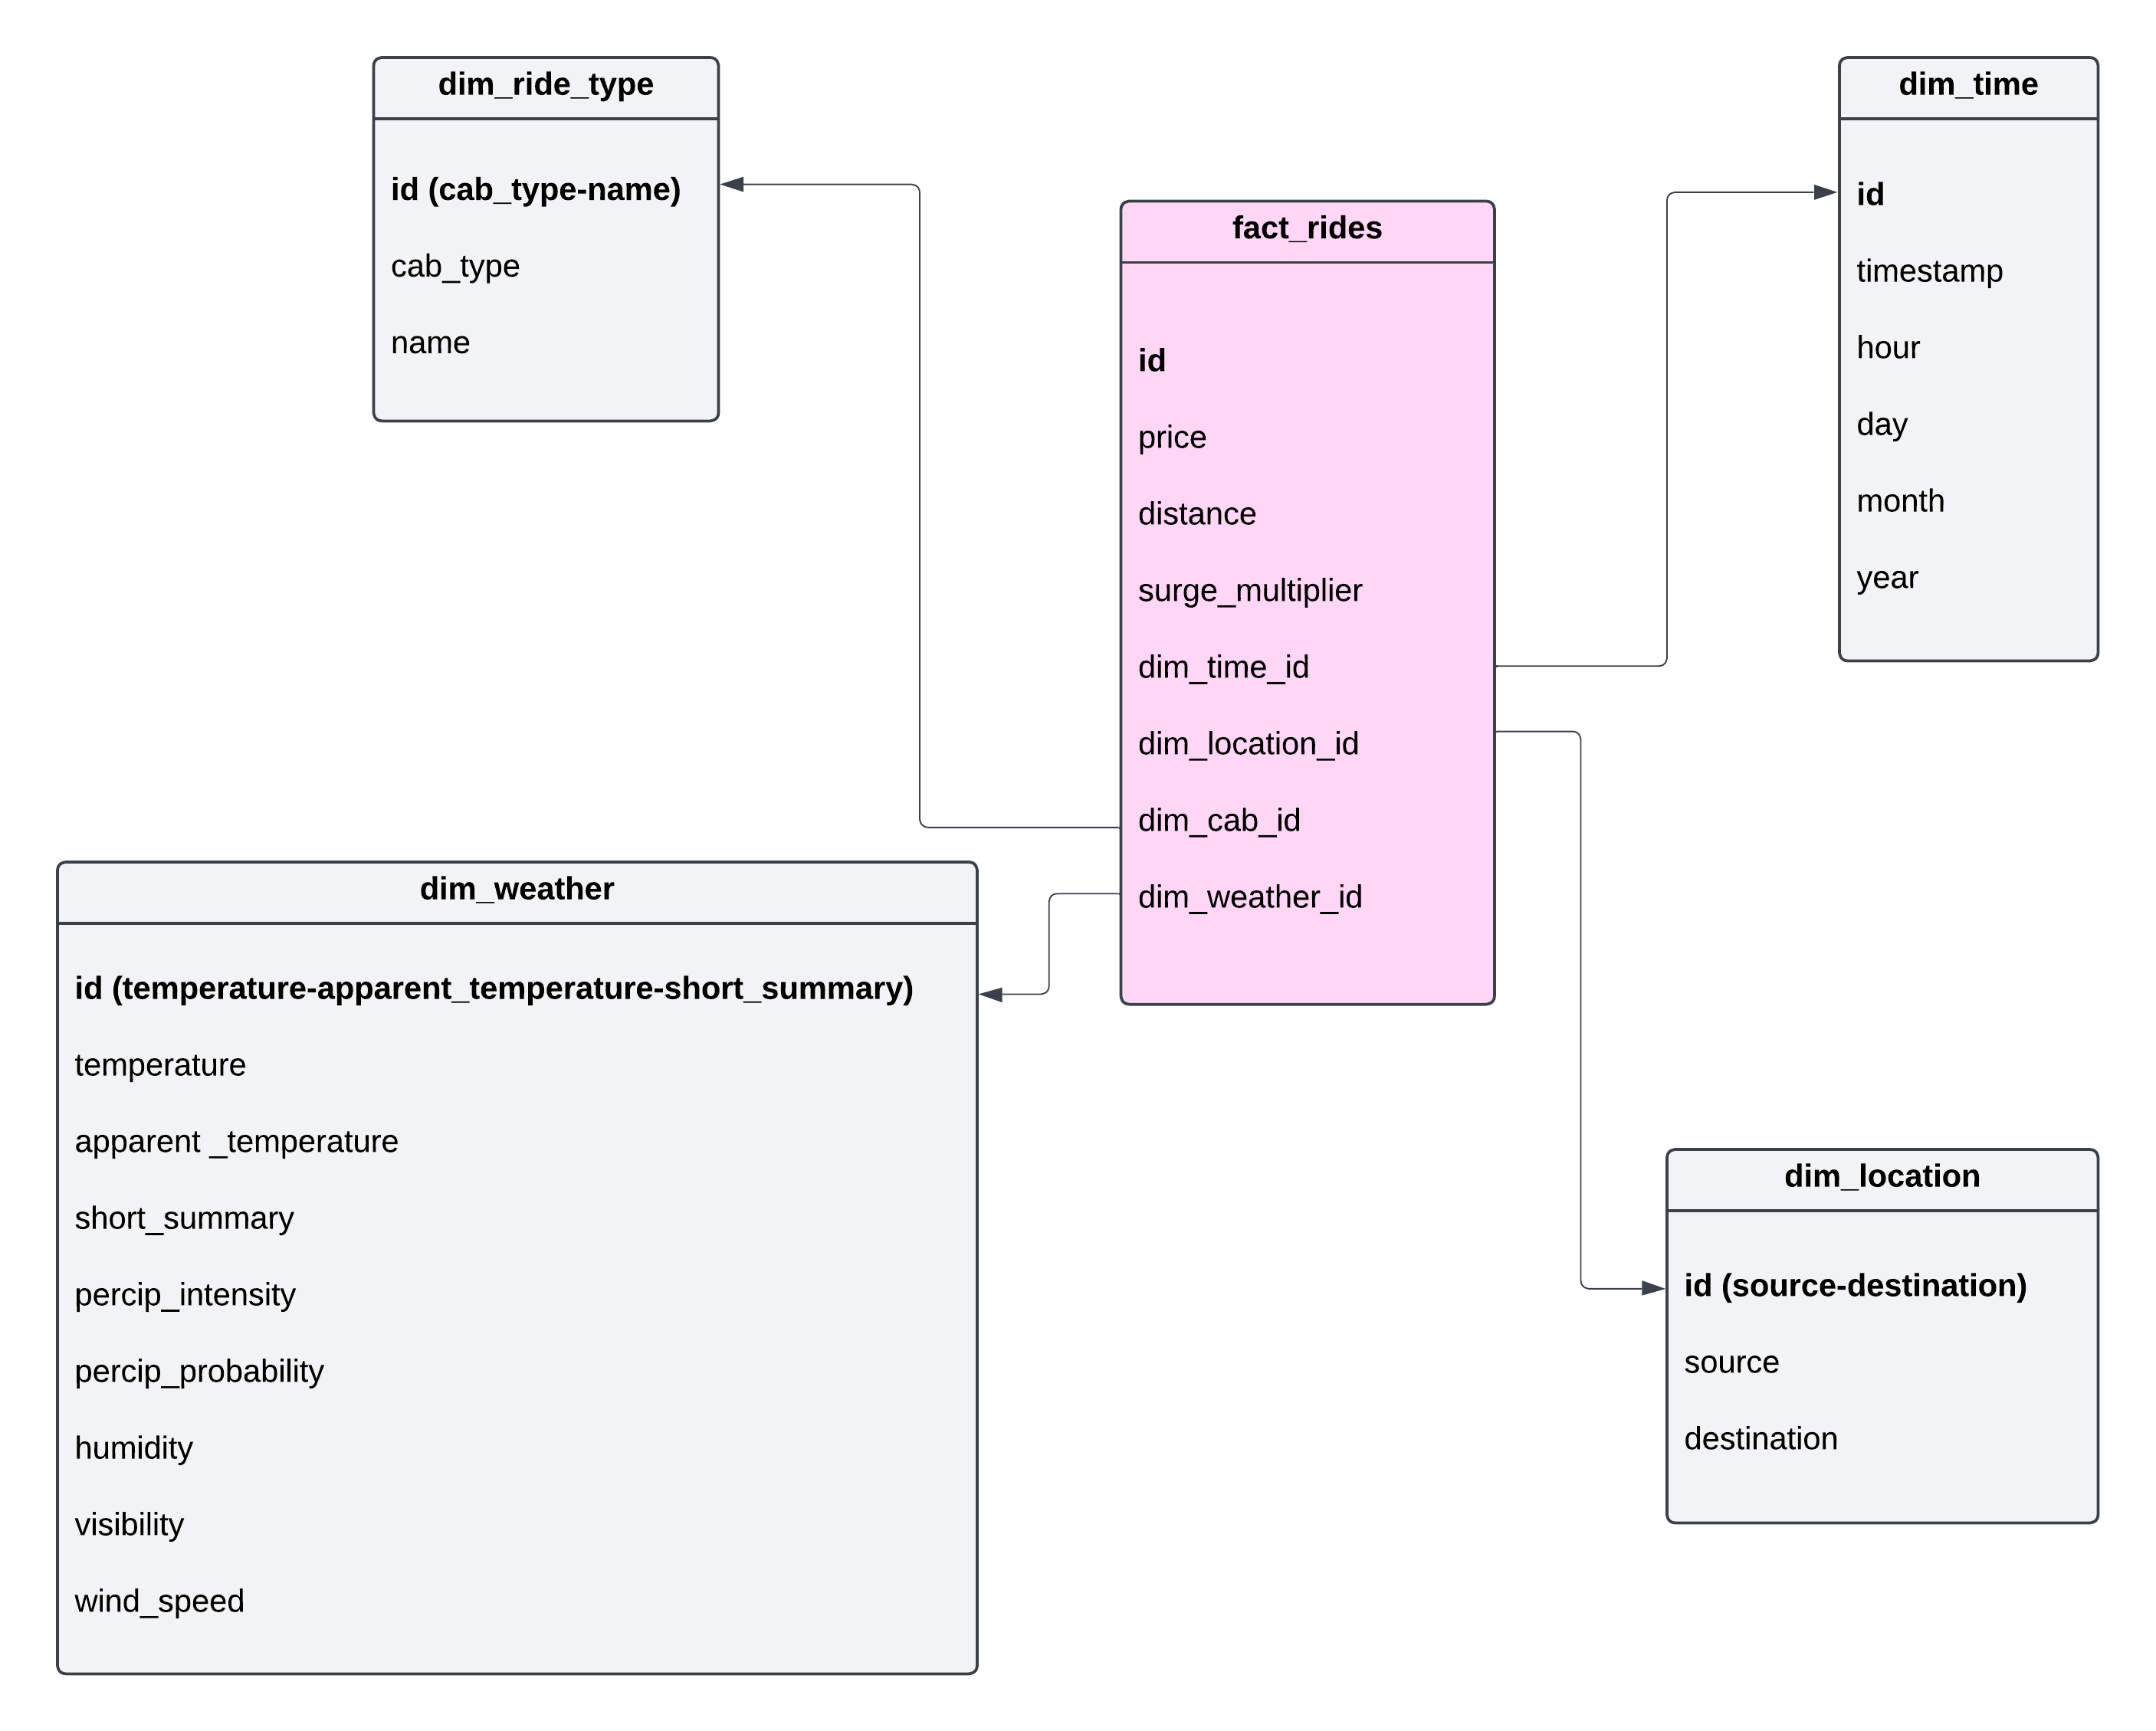

# Ask 2 – Data Wrangling and Dimensional Modeling

### Step 2: Checking Installed Python Packages: `ipython-sql` and `psycopg2`

In [1]:
# Check if 'ipython-sql' or 'psycopg2' packages are installed and display their versions
!pip freeze | grep -E 'ipython-sql|psycopg2'

psycopg2==2.9.9
types-psycopg2==2.9


### Step 3: Install `pgspecial` package

In [2]:
# Install the 'pgspecial' package, which provides special commands for PostgreSQL in interactive environments
!pip install pgspecial

### Step 4: Run this to check PostgreSQL version

In [3]:
# Check the installed version of PostgreSQL by running the psql command-line tool with the --version flag
!psql --version

psql (PostgreSQL) 16.6 (Ubuntu 16.6-0ubuntu0.24.04.1)


### Step 5: Drop old database if exists

In [4]:
# Drop old database named 'final1' using the 'dropdb' command as the 'postgres' user.  
!dropdb -U postgres final1

### Step 6: Creating a new database on Postgres

In [5]:
# Create a new PostgreSQL database named 'final1' using the 'createdb' command as the 'postgres' user
!createdb -U postgres final1

### Step 7: Load SQL extension to run SQL queries

In [6]:
# Load the SQL extension in Jupyter Notebook to enable running SQL queries directly within notebook cells
%load_ext sql

/home/ubuntu/.python3-venv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Step 8: Connecting to the database that was created

In [7]:
# Connect to the 'final1' PostgreSQL database as the 'postgres' user using the SQL extension in Jupyter Notebook
%sql postgresql://postgres@/final1

Connecting to 'postgresql://postgres@/final1'

### Step 9: Uploading the data and unzipping the file

* Given that the data from Kaggle is approximately **45 MB**. We manually upload the data on the instance and proceed with the unzipping the files. 
* The data downloaded from Kaggle is named `archive.zip`

**Code Explanation**
* `!unzip` A shell command to unzip (extract) a compressed .zip file.
* `-o`: Overwrites existing files in the destination directory without prompting for confirmation.

In [8]:
# Unzip the contents of 'archive.zip' into the current directory, overwriting any existing files with the same name
!unzip -o archive.zip 

Archive:  archive.zip
  inflating: rideshare_kaggle.csv    


### Step 10: Count the number of lines: 
* We do this to check the number of rows in the dataset. 

**Code Explanation**
* `wc` Word Count is usually used to count lines, characters and words in a file. 
* `-l` Specifies that the command should count only the number of lines in the file.

In [9]:
# Count the number of lines in the 'rideshare_kaggle.csv' file
!wc -l rideshare_kaggle.csv

693072 rideshare_kaggle.csv


### Step 11: Display the column names to understand the data: 

**Code Explanation:**

* `!csvcut` The command displays the column names in a file
* `-n` Lists all column headers (names) in the CSV file along with their indices.

In [10]:
# Display the column names of the 'rideshare_kaggle.csv' file using the 'csvcut' command
!csvcut -n rideshare_kaggle.csv

  1: id
  2: timestamp
  3: hour
  4: day
  5: month
  6: datetime
  7: timezone
  8: source
  9: destination
 10: cab_type
 11: product_id
 12: name
 13: price
 14: distance
 15: surge_multiplier
 16: latitude
 17: longitude
 18: temperature
 19: apparentTemperature
 20: short_summary
 21: long_summary
 22: precipIntensity
 23: precipProbability
 24: humidity
 25: windSpeed
 26: windGust
 27: windGustTime
 28: visibility
 29: temperatureHigh
 30: temperatureHighTime
 31: temperatureLow
 32: temperatureLowTime
 33: apparentTemperatureHigh
 34: apparentTemperatureHighTime
 35: apparentTemperatureLow
 36: apparentTemperatureLowTime
 37: icon
 38: dewPoint
 39: pressure
 40: windBearing
 41: cloudCover
 42: uvIndex
 43: visibility.1
 44: ozone
 45: sunriseTime
 46: sunsetTime
 47: moonPhase
 48: precipIntensityMax
 49: uvIndexTime
 50: temperatureMin
 51: temperatureMinTime
 52: temperatureMax
 53: temperatureMaxTime
 54: apparentTemperatureMin
 55: apparentTemperatureMinTime
 56: apparen

### Step 12: Extracting Specific columns and moving it to a new CSV:
* We do this to specificly filter out the columns that are required for the data analysis and drop the other columns. 

**Code Explanation**
* `!csvcut` The command displays the column names in a file
* `-c` Specifies the columns to include in the output.
* `>` Redirection operator

In [11]:
# Extract specific columns from the 'rideshare_kaggle.csv' file and save the filtered data into 'filtered_data.csv'
!csvcut -c id,timestamp,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,visibility,windSpeed rideshare_kaggle.csv > filtered_data.csv

### Step 13: Run count of lines and display colmumns in the new CSV

* We see that the new csv has the same number of rows 693072 same as the original dataset, confirming successful process. 

In [12]:
# Count the number of lines in the 'filtered_data.csv' file
!wc -l filtered_data.csv
# Display the column names of the 'filtered_data.csv' file using the 'csvcut' command
!csvcut -n filtered_data.csv

693072 filtered_data.csv
  1: id
  2: timestamp
  3: hour
  4: day
  5: month
  6: source
  7: destination
  8: cab_type
  9: name
 10: price
 11: distance
 12: surge_multiplier
 13: temperature
 14: apparentTemperature
 15: short_summary
 16: precipIntensity
 17: precipProbability
 18: humidity
 19: visibility
 20: windSpeed


### Step 14: Explanation of Variables

1. **id** - **Included**: Unique identifier for each ride, crucial for linking records and ensuring data integrity.
2. **timestamp** - **Included**: Precise timestamp for each ride, enabling detailed temporal analysis.
3. **hour** - **Included**: Hour of the ride, useful for analyzing time-of-day trends.
4. **day** - **Included**: Day of the month, helps identify date-specific patterns.
5. **month** - **Included**: Month of the year, useful for seasonal trend analysis.
6. **datetime** - **Not included**: Redundant, as the 'timestamp' already provides similar information.
7. **timezone** - **Not included**: Irrelevant as all data is assumed to be in a consistent timezone.
8. **source** - **Included**: Starting location, crucial for understanding trip origins.
9. **destination** - **Included**: Ending location, important for analyzing trip destinations.
10. **cab_type** - **Included**: Indicates the service type (e.g., Uber, Lyft), relevant for comparing service providers.
11. **product_id** - **Not included**: Provides minimal analytical value.
12. **name** - **Included**: Specific ride option (e.g., UberX, LyftXL), important for differentiating ride types.
13. **price** - **Included**: Cost of the ride, central to understanding pricing dynamics.
14. **distance** - **Included**: Distance of the ride, a key variable for pricing and trip analysis.
15. **surge_multiplier** - **Included**: Reflects surge pricing, important for analyzing demand peaks.
16. **latitude** - **Not included**: Location-specific details not necessary for this analysis.
17. **longitude** - **Not included**: Location-specific details not necessary for this analysis.
18. **temperature** - **Included**: Weather condition, useful for understanding its impact on rides.
19. **apparentTemperature** - **Included**: Feels-like temperature, adds context to weather conditions.
20. **short_summary** - **Included**: Concise weather description, provides a quick overview.
21. **long_summary** - **Not included**: Redundant as 'short_summary' suffices.
22. **precipIntensity** - **Included**: Intensity of precipitation, relevant for weather impact analysis.
23. **precipProbability** - **Included**: Probability of precipitation, adds further weather context.
24. **humidity** - **Included**: Humidity level, provides insights into weather conditions.
25. **windSpeed** - **Included**: Wind speed, a factor that may influence ride conditions.
26. **windGust** - **Not included**: Less impactful compared to average wind speed.
27. **windGustTime** - **Not included**: Adds unnecessary granularity.
28. **visibility** - **Included**: Visibility conditions, crucial for understanding ride safety and weather effects.
29. **temperatureHigh** - **Not included**: Too granular for this analysis.
30. **temperatureHighTime** - **Not included**: Too granular for this analysis.
31. **temperatureLow** - **Not included**: Too granular for this analysis.
32. **temperatureLowTime** - **Not included**: Too granular for this analysis.
33. **apparentTemperatureHigh** - **Not included**: Too granular for this analysis.
34. **apparentTemperatureHighTime** - **Not included**: Too granular for this analysis.
35. **apparentTemperatureLow** - **Not included**: Too granular for this analysis.
36. **apparentTemperatureLowTime** - **Not included**: Too granular for this analysis.
37. **icon** - **Not included**: Adds minimal value to the analysis.
38. **dewPoint** - **Not included**: Less impactful for ride trends.
39. **pressure** - **Not included**: Less impactful for ride trends.
40. **windBearing** - **Not included**: Less impactful for ride trends.
41. **cloudCover** - **Not included**: Less impactful for ride trends.
42. **uvIndex** - **Not included**: Irrelevant to ride analysis.
43. **visibility.1** - **Not included**: Duplicate of 'visibility'.
44. **ozone** - **Not included**: Irrelevant to ride analysis.
45. **sunriseTime** - **Not included**: Adds minimal value to the analysis.
46. **sunsetTime** - **Not included**: Adds minimal value to the analysis.
47. **moonPhase** - **Not included**: Irrelevant to ride analysis.
48. **precipIntensityMax** - **Not included**: Too granular for this analysis.
49. **uvIndexTime** - **Not included**: Too granular for this analysis.
50. **temperatureMin** - **Not included**: Too granular for this analysis.
51. **temperatureMinTime** - **Not included**: Too granular for this analysis.
52. **temperatureMax** - **Not included**: Too granular for this analysis.
53. **temperatureMaxTime** - **Not included**: Too granular for this analysis.
54. **apparentTemperatureMin** - **Not included**: Too granular for this analysis.
55. **apparentTemperatureMinTime** - **Not included**: Too granular for this analysis.
56. **apparentTemperatureMax** - **Not included**: Too granular for this analysis.
57. **apparentTemperatureMaxTime** - **Not included**: Too granular for this analysis.

### Step 15: Display first 5 rows of the filtered_data.csv

**Code Explanation** 
* The `head` command displays the first few lines of a file.
* `-n 5` specifies the number of lines to display, in this case, the first 5 lines of the file `filtered_data.csv`.

In [13]:
# Display the first 5 rows of the 'filtered_data.csv' file in a table format using 'csvlook'
!head -n 5 filtered_data.csv | csvlook

| id                                   |         timestamp | hour | day | month | source           | destination   | cab_type | name         | price | distance | surge_multiplier | temperature | apparentTemperature | short_summary   | precipIntensity | precipProbability | humidity | visibility | windSpeed |
| ------------------------------------ | ----------------- | ---- | --- | ----- | ---------------- | ------------- | -------- | ------------ | ----- | -------- | ---------------- | ----------- | ------------------- | --------------- | --------------- | ----------------- | -------- | ---------- | --------- |
| 424553bb-7174-41ea-aeb4-fe06d4f4b9d7 | 1,544,952,607.890 |    9 |  16 |    12 | Haymarket Square | North Station | Lyft     | Shared       |     5 |     0.44 |             True |       42.34 |               37.12 |  Mostly Cloudy  |          0.000… |             False |     0.68 |     10.000 |      8.66 |
| 4bd23055-6827-41c6-b23b-3c491f24e74d | 1,543,284,023.677 |    2 |  27 |

### Step 16: Creating a new file with columns required for the Fact Table
* We do this because we need to load selective columns into our fact table. Loading all columns will throw an error.

**Code Explanation**
* `csvcut` is used to specify complex csv operations. 
* The code specifies required columns from one file and moves it into a new csv. 

In [14]:
# Extract specific columns from the 'filtered_data.csv' file and save the filtered data into 'fact_r.csv'
!csvcut -c id,timestamp,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,visibility,windSpeed filtered_data.csv > fact_r.csv

### Step 17: Print first few rows to inspect data load

In [15]:
# Display the first 10 rows of the 'fact_r.csv' file in a table format using 'csvlook'
!head -n 10 fact_r.csv | csvlook

/usr/lib/python3/dist-packages/agate/table/from_csv.py:67: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(contents.getvalue()[:sniff_limit])
| id                                   |         timestamp | source           | destination             | cab_type | name         | price | distance | surge_multiplier | temperature | apparentTemperature | short_summary   | precipIntensity | precipProbability | humidity | visibility | windSpeed |
| ------------------------------------ | ----------------- | ---------------- | ----------------------- | -------- | ------------ | ----- | -------- | ---------------- | ----------- | ------------------- | --------------- | --------------- | ----------------- | -------- | ---------- | --------- |
| 424553bb-7174-41ea-aeb4-fe06d4f4b9d7 | 1,544,952,607.890 | Haymarket Square | North Station           | Lyft     | Shared       |   5.0 |     0.44 |             True |       42.34 |           

Based on this output , most of the rides seem to start from Haymarket Sqaure or Back Bay and end at either North Station or Northeastern University. We can use this dataset to analyze trends on how ride prices or distances change over time, or how certain weather conditions (like rain or clear weather) influence the ride type or pricing. By analyzing the surge multiplier, we can find patterns of higher prices during busy hours, certain weather conditions or locations.

### Step 18: Replacing NA values with Null 
* Upon analysing the data throughly, we understand there are a lot of NA values, to avoid confusions and clean the data, we replace all NA values with NULL in the data set with the below command. 

**Code Explanation**
* `sed` command stands for "stream editor" and is used for performing text transformations or edits on files.
* `s`: Indicates a substitution operation.
* `NA`: The text to search for (in this case, `NA`).
* `NULL`: The replacement text.
* `g`: Global flag, meaning all occurrences of `NA` in each line are replaced, not just the first one.

In [16]:
# Replace all occurrences of 'NA' with 'NULL' in the 'fact_r.csv' file
!sed -i 's/NA/NULL/g' /home/ubuntu/fact_r.csv

### Step 19: Create Fact table: fact_rides_raw

In [17]:
%%sql
DROP TABLE IF EXISTS fact_rides_raw;

CREATE TABLE fact_rides_raw (
    id UUID PRIMARY KEY,                   -- Unique identifier for each ride (UUID format)
    timestamp FLOAT,                       -- Timestamp when the ride occurred
    source VARCHAR(255),                   -- Source location of the ride
    destination VARCHAR(255),              -- Destination location of the ride
    cab_type VARCHAR(50),                  -- Type of cab used for the ride (e.g., sedan, SUV)
    name VARCHAR(50),                      -- Name or identifier for the ride
    price FLOAT,                           -- Price of the ride
    distance FLOAT,                        -- Distance traveled in the ride (in miles or kilometers)
    surge_multiplier FLOAT,               -- Surge pricing multiplier applied during the ride
    temperature FLOAT,                     -- Temperature at the time of the ride (in degrees Celsius or Fahrenheit)
    apparent_temperature FLOAT,            -- Apparent temperature (e.g., "feels like" temperature)
    short_summary VARCHAR(50),             -- Short description or summary of the weather conditions during the ride
    precip_intensity FLOAT,                -- Intensity of precipitation (e.g., rain) during the ride
    precip_probability FLOAT,              -- Probability of precipitation during the ride
    humidity FLOAT,                        -- Humidity at the time of the ride
    visibility FLOAT,                      -- Visibility (e.g., how far one can see) during the ride
    wind_speed FLOAT                       -- Wind speed at the time of the ride
);

Running query in 'postgresql://postgres@/final1'

++
||
++
++

### Step 20: Loading the Fact table
* We load our fact table from the fact_r.csv created earlier.
* Rows affected indicates that it was successful.

In [18]:
%%sql
-- Copy data from the 'fact_r.csv' file into the 'fact_rides_raw' table, mapping columns accordingly
COPY fact_rides_raw (
    id,                                 -- Unique identifier for each ride
    timestamp,                          -- Timestamp of the ride
    source,                             -- Source location of the ride
    destination,                        -- Destination location of the ride
    cab_type,                           -- Type of the cab used for the ride
    name,                               -- Name or identifier for the ride
    price,                              -- Price of the ride
    distance,                           -- Distance traveled in the ride
    surge_multiplier,                  -- Surge pricing multiplier during the ride
    temperature,                        -- Temperature at the time of the ride
    apparent_temperature,               -- Apparent temperature (feels like)
    short_summary,                      -- Short description of the ride's weather
    precip_intensity,                   -- Intensity of precipitation during the ride
    precip_probability,                 -- Probability of precipitation during the ride
    humidity,                           -- Humidity at the time of the ride
    visibility,                         -- Visibility during the ride
    wind_speed                          -- Wind speed during the ride
)
FROM '/home/ubuntu/fact_r.csv'            -- Path to the CSV file containing the data
CSV HEADER NULL 'NULL';                   -- Indicates the file is in CSV format, with headers and 'NULL' representing missing values

Running query in 'postgresql://postgres@/final1'

693071 rows affected.

++
||
++
++

### Step 21: To check for the completeness of the table
* We run this to determine the completeness of data in the specified columns (`price`, `distance`, `surge_multiplier`) by checking how many values are non-null.
* To get the total number of rows in the table, which provides a baseline for assessing data quality.

**Code explanation**
* `SELECT` Specifies the columns or calculations to return in the query result.
* `COUNT(*)`: Counts all rows in the `fact_rides_raw` table, including those with null values in any column.
* `AS total_rows`: Assigns an alias (`total_rows`) for easier reference to this value in the result.
* `COUNT(column_name)`: Counts only the non-null values in the `price` column.
* `AS non_null_prices`: Assigns an alias for this count.
* `COUNT(distance) AS non_null_distances`: Counts the non-null values in the `distance` column and assigns the alias `non_null_distances`.
* `COUNT(surge_multiplier) AS non_null_surge_multipliers`: Counts the non-null values in the `surge_multiplier` column and assigns the alias `non_null_surge_multipliers`.

In [19]:
%%sql
-- Query to count the total number of rows and the number of non-null values in specific columns
SELECT COUNT(*) AS total_rows,                     -- Total number of rows in the 'fact_rides_raw' table
       COUNT(price) AS non_null_prices,            -- Count of non-null 'price' values
       COUNT(distance) AS non_null_distances,      -- Count of non-null 'distance' values
       COUNT(surge_multiplier) AS non_null_surge_multipliers  -- Count of non-null 'surge_multiplier' values
FROM fact_rides_raw;                               -- Querying data from the 'fact_rides_raw' table

Running query in 'postgresql://postgres@/final1'

1 rows affected.

total_rows,non_null_prices,non_null_distances,non_null_surge_multipliers
693071,637976,693071,693071


As we can see from the table, while we have no null 'surge multiplier' or 'distance values', we do have some null price values that we handle in the next step.

### Step 22: To handle missing values (`NULL`) in the `price` column by replacing them with a default value of `0.0`.
* Ensures that the `price` column contains no null values, which is useful for calculations, reporting, or database constraints that do not allow `NULL` values.

**Code Explanation**
1. **`UPDATE fact_rides_raw`**:
   - Specifies the table (`fact_rides_raw`) where rows will be updated.

2. **`SET price = 0.0`**:
   - Sets the value of the `price` column to `0.0` for rows that meet the condition specified in the `WHERE` clause.

3. **`WHERE price IS NULL`**:
   - Ensures that only rows where the `price` column is currently `NULL` will be updated.
   - Prevents overwriting existing non-null values in the `price` column.

In [20]:
%%sql
-- Update the 'fact_rides_raw' table, setting 'price' to 0.0 where the 'price' is NULL
UPDATE fact_rides_raw
SET price = 0.0                       -- Set 'price' to 0.0 for rows where it is NULL
WHERE price IS NULL;                  -- Only affect rows where 'price' is currently NULL

Running query in 'postgresql://postgres@/final1'

55095 rows affected.

++
||
++
++

### Step 23: Print data from the fact table for inspection

In [21]:
%%sql
-- Select the first 10 rows from the 'fact_rides_raw' table for inspection
SELECT *
FROM fact_rides_raw 
LIMIT 10;  -- Limits the result to 10 rows to quickly preview the data

Running query in 'postgresql://postgres@/final1'

10 rows affected.

id,timestamp,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparent_temperature,short_summary,precip_intensity,precip_probability,humidity,visibility,wind_speed
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.0,0.0,0.68,10.0,8.66
4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.677,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.1299,1.0,0.94,4.786,11.98
981a3613-77af-4620-a42a-0c0866077d1e,1543366822.198,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.0,0.0,0.75,10.0,7.33
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.749,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.0,0.0,0.73,10.0,5.28
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.223,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.0,0.0,0.7,10.0,9.14
f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1545071112.138,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,38.75,33.51,Overcast,0.0,0.0,0.84,8.325,7.19
462816a3-820d-408b-8549-0b39e82f65ac,1543208580.2,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,41.99,41.99,Overcast,0.0,0.0,0.91,4.675,0.53
474d6376-bc59-4ec9-bf57-4e6d6faeb165,1543780384.677,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,49.88,49.22,Light Rain,0.0246,1.0,0.93,3.052,3.38
4f9fee41-fde3-4767-bbf1-a00e108701fb,1543818482.645,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0,45.58,45.58,Foggy,0.0,0.0,0.96,1.413,1.25
8612d909-98b8-4454-a093-30bd48de0cb3,1543315522.249,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,45.45,41.77,Light Rain,0.0624,1.0,0.93,2.686,6.87


### Step 24: Rerun to count null values from the table: 

In [22]:
%%sql
-- Query to count the total number of rows and the number of non-null values in specific columns
SELECT COUNT(*) AS total_rows,                     -- Total number of rows in the 'fact_rides_raw' table
       COUNT(price) AS non_null_prices,            -- Count of non-null 'price' values
       COUNT(distance) AS non_null_distances,      -- Count of non-null 'distance' values
       COUNT(surge_multiplier) AS non_null_surge_multipliers  -- Count of non-null 'surge_multiplier' values
FROM fact_rides_raw;  

Running query in 'postgresql://postgres@/final1'

1 rows affected.

total_rows,non_null_prices,non_null_distances,non_null_surge_multipliers
693071,693071,693071,693071


All null values have been removed

### Step 25: Creation of Dimension tables and final Fact table
* We create the following Dimension tables - `dim_time`, `dim_location`, `dim_ride_type`, `dim_weather`
* We create the following Fact table - `fact_rides`

In [23]:
%%sql
-- Create a 'dim_time' table to store time-related information
CREATE TABLE dim_time (
    id SERIAL PRIMARY KEY,              -- Unique identifier for each time entry
    timestamp TIMESTAMP UNIQUE,         -- Timestamp of the ride, stored as a unique value
    hour INT,                           -- Hour of the day (from 0 to 23)
    day INT,                            -- Day of the month
    month INT,                          -- Month (from 1 to 12)
    year INT                            -- Year of the ride
);

-- Create a 'dim_location' table to store location-related information
CREATE TABLE dim_location (
    id VARCHAR(255) PRIMARY KEY,        -- Unique identifier for each location entry
    source VARCHAR(255) NOT NULL,       -- Source location of the ride
    destination VARCHAR(255) NOT NULL   -- Destination location of the ride
);

-- Create a 'dim_ride_type' table to store information about ride types (cab type and name)
CREATE TABLE dim_ride_type (
    id VARCHAR(255) PRIMARY KEY,        -- Unique identifier for each ride type entry
    cab_type VARCHAR(50) NOT NULL,      -- Type of the cab (e.g., sedan, SUV)
    name VARCHAR(50) NOT NULL           -- Name or identifier for the ride type
);

-- Create a 'dim_weather' table to store weather-related information
CREATE TABLE dim_weather (
    id VARCHAR(255) PRIMARY KEY,        -- Unique identifier for each weather entry
    temperature FLOAT,                  -- Temperature at the time of the ride
    apparent_temperature FLOAT,         -- Apparent temperature (e.g., feels like)
    short_summary VARCHAR(50),          -- Short summary of the weather conditions
    precip_intensity FLOAT,             -- Intensity of precipitation during the ride
    precip_probability FLOAT,           -- Probability of precipitation during the ride
    humidity FLOAT,                     -- Humidity at the time of the ride
    visibility FLOAT,                   -- Visibility during the ride
    wind_speed FLOAT                    -- Wind speed during the ride
);

-- Create a 'fact_rides' table to store ride data, with foreign keys referencing the dimension tables
CREATE TABLE fact_rides (
    id UUID PRIMARY KEY,                 -- Unique identifier for each ride
    dim_time_id INT REFERENCES dim_time (id),          -- Foreign key to 'dim_time' table
    dim_location_id VARCHAR REFERENCES dim_location (id), -- Foreign key to 'dim_location' table
    dim_cab_id VARCHAR REFERENCES dim_ride_type (id),    -- Foreign key to 'dim_ride_type' table
    dim_weather_id VARCHAR REFERENCES dim_weather (id),  -- Foreign key to 'dim_weather' table
    price FLOAT,                          -- Price of the ride
    distance FLOAT,                       -- Distance traveled during the ride
    surge_multiplier FLOAT               -- Surge multiplier during the ride
);

Running query in 'postgresql://postgres@/final1'

++
||
++
++

### Step 26: Loading data into the Dim_time table:
* We load the data into `dim_time` from the earlier created `fact_rides_raw` table. 

In [24]:
%%sql
-- Insert distinct time-related data from the 'fact_rides_raw' table into the 'dim_time' dimension table
INSERT INTO dim_time (timestamp, hour, day, month, year)
SELECT DISTINCT 
    TO_CHAR(TO_TIMESTAMP(timestamp), 'YYYY-MM-DD HH24:MI:SS')::TIMESTAMP AS timestamp,  -- Convert the 'timestamp' field to a proper TIMESTAMP format
    EXTRACT(HOUR FROM TO_TIMESTAMP(timestamp)) AS hour,                                      -- Extract the hour from the 'timestamp'
    EXTRACT(DAY FROM TO_TIMESTAMP(timestamp)) AS day,                                        -- Extract the day from the 'timestamp'
    EXTRACT(MONTH FROM TO_TIMESTAMP(timestamp)) AS month,                                    -- Extract the month from the 'timestamp'
    EXTRACT(YEAR FROM TO_TIMESTAMP(timestamp)) AS year                                      -- Extract the year from the 'timestamp'
FROM fact_rides_raw;  -- Select data from the 'fact_rides_raw' table to insert into 'dim_time'

Running query in 'postgresql://postgres@/final1'

31825 rows affected.

++
||
++
++

### Step 27: Loading data into the Dim_location table:
* We load the data into `dim_location` from the earlier created `fact_rides_raw` table. 

In [25]:
%%sql
-- Insert distinct location-related data from the 'fact_rides_raw' table into the 'dim_location' dimension table
INSERT INTO dim_location (id, source, destination)
SELECT DISTINCT 
    CONCAT(source, '-', destination) AS id,  -- Create a unique 'id' by concatenating 'source' and 'destination'
    source,                                 -- Insert the 'source' location
    destination                             -- Insert the 'destination' location
FROM fact_rides_raw;  -- Select data from the 'fact_rides_raw' table to insert into 'dim_location'

Running query in 'postgresql://postgres@/final1'

72 rows affected.

++
||
++
++

### Step 28: Loading data into the dim_ride_type table:
* We load the data into `dim_ride_type` from the earlier created `fact_rides_raw` table. 

In [26]:
%%sql
-- Insert distinct ride type-related data from the 'fact_rides_raw' table into the 'dim_ride_type' dimension table
INSERT INTO dim_ride_type (id, cab_type, name)
SELECT DISTINCT 
    CONCAT(cab_type, '-', name) AS id,  -- Create a unique 'id' by concatenating 'cab_type' and 'name'
    cab_type,                           -- Insert the 'cab_type' (e.g., sedan, SUV)
    name                                -- Insert the 'name' (e.g., ride ID or name)
FROM fact_rides_raw;  -- Select data from the 'fact_rides_raw' table to insert into 'dim_ride_type'

Running query in 'postgresql://postgres@/final1'

13 rows affected.

++
||
++
++

### Step 29: Loading data into the dim_weather table:
* We load the data into `dim_weather` from the earlier created `fact_rides_raw` table. 

In [27]:
%%sql
-- Insert distinct weather-related data from the 'fact_rides_raw' table into the 'dim_weather' dimension table
INSERT INTO dim_weather (id, temperature, apparent_temperature, short_summary, precip_intensity, precip_probability, humidity, visibility, wind_speed)
SELECT DISTINCT 
    CONCAT(temperature, '-', apparent_temperature, '-', short_summary) AS id,  -- Create a unique 'id' by concatenating 'temperature', 'apparent_temperature', and 'short_summary'
    temperature,                                                             -- Insert the 'temperature' value
    apparent_temperature,                                                    -- Insert the 'apparent_temperature' (e.g., feels like)
    short_summary,                                                           -- Insert the 'short_summary' of the weather conditions
    precip_intensity,                                                        -- Insert the 'precip_intensity' (intensity of precipitation)
    precip_probability,                                                      -- Insert the 'precip_probability' (probability of precipitation)
    humidity,                                                                -- Insert the 'humidity' value
    visibility,                                                              -- Insert the 'visibility' value
    wind_speed                                                              -- Insert the 'wind_speed' value
FROM fact_rides_raw;  -- Select data from the 'fact_rides_raw' table to insert into 'dim_weather'

Running query in 'postgresql://postgres@/final1'

332 rows affected.

++
||
++
++

### Step 30: Loading data into the `fact_rides` table and linking it to the other dimension tables:

**Code Explanation**
1. **`INSERT INTO fact_rides`**:
   - Specifies the target table (`fact_rides`) where data will be inserted.
   - Defines the columns being populated:
     - `id`: Unique identifier for each ride.
     - `dim_time_id`: Foreign key referencing the `dim_time` table.
     - `dim_location_id`: Foreign key referencing the `dim_location` table.
     - `dim_cab_id`: Foreign key referencing the `dim_ride_type` table.
     - `dim_weather_id`: Foreign key referencing the `dim_weather` table.
     - `price`: Ride price.
     - `distance`: Ride distance.
     - `surge_multiplier`: Surge multiplier.

2. **`SELECT`**:
   - Pulls the necessary fields from the `fact_rides_raw` table and joins the corresponding dimension tables to retrieve their keys.

3. **Joins to Dimension Tables**:
   - **`JOIN dim_time`**:
     - Matches the `timestamp` from the `fact_rides_raw` table to the `timestamp` in the `dim_time` table using the `EXTRACT(EPOCH FROM dt.timestamp)` function for consistency.
   - **`JOIN dim_location`**:
     - Matches the concatenated `source` and `destination` from the `fact_rides_raw` table to the `id` in the `dim_location` table.
   - **`JOIN dim_ride_type`**:
     - Matches the concatenated `cab_type` and `name` from the `fact_rides_raw` table to the `id` in the `dim_ride_type` table.
   - **`JOIN dim_weather`**:
     - Matches a concatenated string of `temperature`, `apparent_temperature`, and `short_summary` from the `fact_rides_raw` table to the `id` in the `dim_weather` table.

4. **Fields Being Inserted**:
   - After successfully joining the relevant dimension tables, the following fields are inserted into `fact_rides`:
     - Ride-specific details (`price`, `distance`, `surge_multiplier`).
     - Foreign keys (`dim_time_id`, `dim_location_id`, `dim_cab_id`, `dim_weather_id`).

In [28]:
%%sql
-- Insert data into the 'fact_rides' fact table, linking it to the appropriate dimension tables
INSERT INTO fact_rides (
    id,                              -- Unique identifier for each ride
    dim_time_id,                     -- Foreign key reference to the 'dim_time' table
    dim_location_id,                 -- Foreign key reference to the 'dim_location' table
    dim_cab_id,                      -- Foreign key reference to the 'dim_ride_type' table
    dim_weather_id,                  -- Foreign key reference to the 'dim_weather' table
    price,                           -- Price of the ride
    distance,                        -- Distance of the ride
    surge_multiplier                -- Surge pricing multiplier for the ride
)
SELECT 
    fr.id,                            -- Ride ID from the 'fact_rides_raw' table
    dt.id AS dim_time_id,             -- Time dimension ID (matching timestamp in 'dim_time')
    dl.id AS dim_location_id,         -- Location dimension ID (matching source and destination in 'dim_location')
    drt.id AS dim_cab_id,             -- Ride type dimension ID (matching cab type and name in 'dim_ride_type')
    dw.id AS dim_weather_id,          -- Weather dimension ID (matching temperature, apparent temperature, and short summary in 'dim_weather')
    fr.price,                         -- Ride price from the 'fact_rides_raw' table
    fr.distance,                      -- Ride distance from the 'fact_rides_raw' table
    fr.surge_multiplier               -- Surge multiplier from the 'fact_rides_raw' table
FROM fact_rides_raw fr
JOIN dim_time dt ON fr.timestamp = EXTRACT(EPOCH FROM dt.timestamp)  -- Join 'dim_time' by matching timestamp
JOIN dim_location dl ON CONCAT(fr.source, '-', fr.destination) = dl.id  -- Join 'dim_location' by matching source and destination
JOIN dim_ride_type drt ON CONCAT(fr.cab_type, '-', fr.name) = drt.id  -- Join 'dim_ride_type' by matching cab type and name
JOIN dim_weather dw ON CONCAT(fr.temperature, '-', fr.apparent_temperature, '-', fr.short_summary) = dw.id;  -- Join 'dim_weather' by matching weather-related fields

Running query in 'postgresql://postgres@/final1'

455117 rows affected.

++
||
++
++

### Step 31: Run word count to check if data load is successful: 

In [29]:
%%sql
-- Count the total number of rows in the 'fact_rides_raw' table
SELECT COUNT(*) AS total_rows_fact_rides_raw 
FROM fact_rides_raw;  -- Get the total number of rows in the 'fact_rides_raw' table

-- Count the total number of rows in the 'fact_rides' table
SELECT COUNT(*) AS total_rows_fact_rides 
FROM fact_rides;  -- Get the total number of rows in the 'fact_rides' fact table

Running query in 'postgresql://postgres@/final1'

1 rows affected.

1 rows affected.

total_rows_fact_rides
455117


### Step 32: Select the first 10 rows from the `fact_rides` fact table for inspection

In [30]:
%%sql
-- Select the first 10 rows from the 'fact_rides' fact table for inspection
SELECT * FROM fact_rides LIMIT 10;  -- Limits the result to the first 10 rows to quickly preview the data

Running query in 'postgresql://postgres@/final1'

10 rows affected.

id,dim_time_id,dim_location_id,dim_cab_id,dim_weather_id,price,distance,surge_multiplier
6d81f269-ea29-4084-a32b-d9fcf18d80f6,57,Fenway-North Station,Uber-Taxi,47.25-44.57- Clear,0.0,3.09,1.0
4214ab0d-72dc-4a0d-820f-2a3b106bfe82,57,Fenway-North Station,Uber-UberPool,47.25-44.57- Clear,8.0,3.09,1.0
02558c9d-deb9-4125-b6c4-05599dde47ff,57,Fenway-North Station,Uber-UberX,47.25-44.57- Clear,10.5,3.09,1.0
c13bdc03-ea4e-4e90-aa46-4afa04ac779b,57,West End-Haymarket Square,Lyft-Lux Black XL,47.25-44.57- Clear,26.0,0.71,1.0
bc61b445-4b35-49a8-802c-920f01fcdd34,57,West End-Haymarket Square,Lyft-Lux Black,47.25-44.57- Clear,16.5,0.71,1.0
ac714a63-0c1d-4539-af02-7ab06d9ca861,57,West End-Haymarket Square,Lyft-Shared,47.25-44.57- Clear,5.0,0.71,1.0
c5a8e50f-fd21-49ba-af66-d90e96fb7f98,57,Boston University-Beacon Hill,Uber-UberXL,47.25-44.57- Clear,16.0,2.79,1.0
41b324c0-dcce-40f6-9a58-b722beec4cb0,83,Back Bay-South Station,Uber-Taxi,49.88-49.22- Light Rain,0.0,1.89,1.0
28d3ff02-fe5e-436b-95a9-0fbafe30c270,83,Back Bay-South Station,Uber-UberX,49.88-49.22- Light Rain,8.5,1.89,1.0
24fb6079-aaf2-4cb1-83ad-aa159c284672,83,Back Bay-South Station,Uber-Black SUV,49.88-49.22- Light Rain,27.0,1.89,1.0


### Step 33: Select the first 10 rows from tables for inspection:

In [31]:
%%sql
-- Select the first 10 rows from the 'dim_time' dimension table for inspection
SELECT * FROM dim_time LIMIT 10;

-- Select the first 10 rows from the 'dim_location' dimension table for inspection
SELECT * FROM dim_location LIMIT 10;

-- Select the first 10 rows from the 'dim_ride_type' dimension table for inspection
SELECT * FROM dim_ride_type LIMIT 10;

-- Select the first 10 rows from the 'dim_weather' dimension table for inspection
SELECT * FROM dim_weather LIMIT 10;

Running query in 'postgresql://postgres@/final1'

10 rows affected.

10 rows affected.

10 rows affected.

10 rows affected.

id,temperature,apparent_temperature,short_summary,precip_intensity,precip_probability,humidity,visibility,wind_speed
46.23-43.49- Light Rain,46.23,43.49,Light Rain,0.0488,1.0,0.92,3.564,5.47
41.22-41.22- Foggy,41.22,41.22,Foggy,0.0,0.0,0.91,1.824,2.74
48.83-48.83- Overcast,48.83,48.83,Overcast,0.0,0.0,0.96,7.79,2.83
39.33-36.3- Partly Cloudy,39.33,36.3,Partly Cloudy,0.0,0.0,0.62,9.961,4.26
30.46-30.46- Mostly Cloudy,30.46,30.46,Mostly Cloudy,0.0,0.0,0.56,9.908,2.48
30.78-20.93- Clear,30.78,20.93,Clear,0.0,0.0,0.4,10.0,12.73
38.61-32.4- Mostly Cloudy,38.61,32.4,Mostly Cloudy,0.0,0.0,0.68,10.0,8.99
47.25-44.57- Clear,47.25,44.57,Clear,0.0,0.0,0.57,10.0,5.68
40.29-34.72- Clear,40.29,34.72,Clear,0.0,0.0,0.6,9.997,8.44
35.22-30.73- Mostly Cloudy,35.22,30.73,Mostly Cloudy,0.0,0.0,0.79,9.926,5.15


# Ask 3: Data analysis and visualization

Enable inline plotting and import required packages for visualizations

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Business Question 1：Which locations could benefit from an increased amount of drivers to capture all ridership demand and at what hours is this increased supply of drivers most needed?

Surge pricing occurs when demand is greater than supply. This question will look at when and where surge pricing occurs most frequently to see where and when more drivers are needed. Potential solutions to this problem are also discussed.  

### Step 1: Query to get the hourly and neigboorhood breakdown of the precent of rides with the highest surge

In [33]:
%%sql surge_effectiveness <<
SELECT
    dt.hour,
    dl.source,
    (COUNT(*) FILTER (WHERE fr.surge_multiplier > 1.0) * 100.0 / COUNT(fr.id)) AS percentage_with_surge
FROM fact_rides fr
JOIN dim_time dt
    ON fr.dim_time_id = dt.id
JOIN dim_location dl ON fr.dim_location_id = dl.id
GROUP BY dt.hour, dl.source
ORDER BY percentage_with_surge DESC;

Running query in 'postgresql://postgres@/final1'

288 rows affected.

In [34]:
surge_effectiveness

hour,source,percentage_with_surge
0,Fenway,6.9112627986348123
8,Theatre District,6.8633739576651700
13,Back Bay,6.8138195777351248
9,Back Bay,6.7825112107623318
1,Northeastern University,6.6161268090971744
23,Northeastern University,6.5777777777777778
13,Beacon Hill,6.1991869918699187
17,Boston University,6.1978545887961859
20,Theatre District,6.1700526711813394
11,Northeastern University,6.0309278350515464


### Step 2: Create a graph to see the highest percentage of surge pricing that occurs each hour

In [35]:
# Convert the SQL result to a DataFrame
df1 = surge_effectiveness.DataFrame()

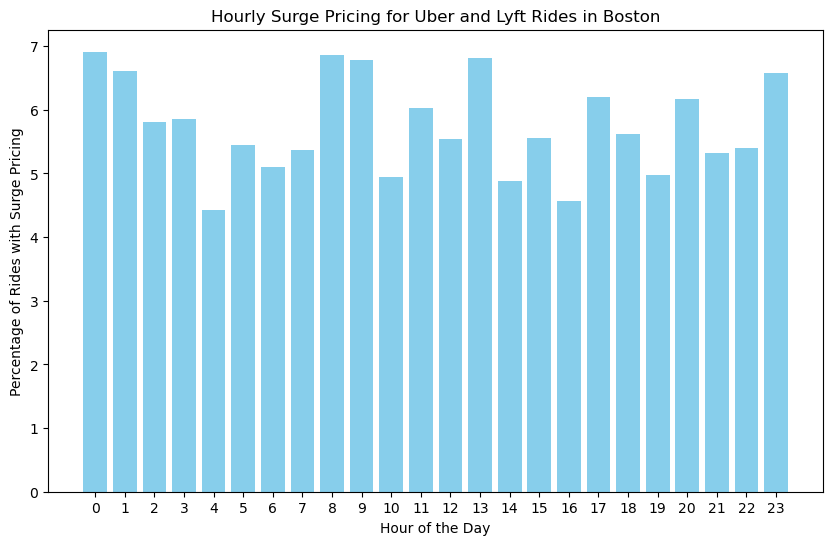

In [36]:
# Bar Chart for Hourly Surge Pricing
plt.figure(figsize=(10, 6))
plt.bar(df1['hour'], df1['percentage_with_surge'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Rides with Surge Pricing')
plt.title('Hourly Surge Pricing for Uber and Lyft Rides in Boston')
plt.xticks(range(0, 24))
plt.show()

**Insights:**  We can infer from this graph that the times of day with the most demand that is unable to be met occurs Between 11pm-1am, 8am-9am, and at 1pm.

### Step 3: Create a bar graph to see the highest percentage of surge rides that happen in an hour in each location

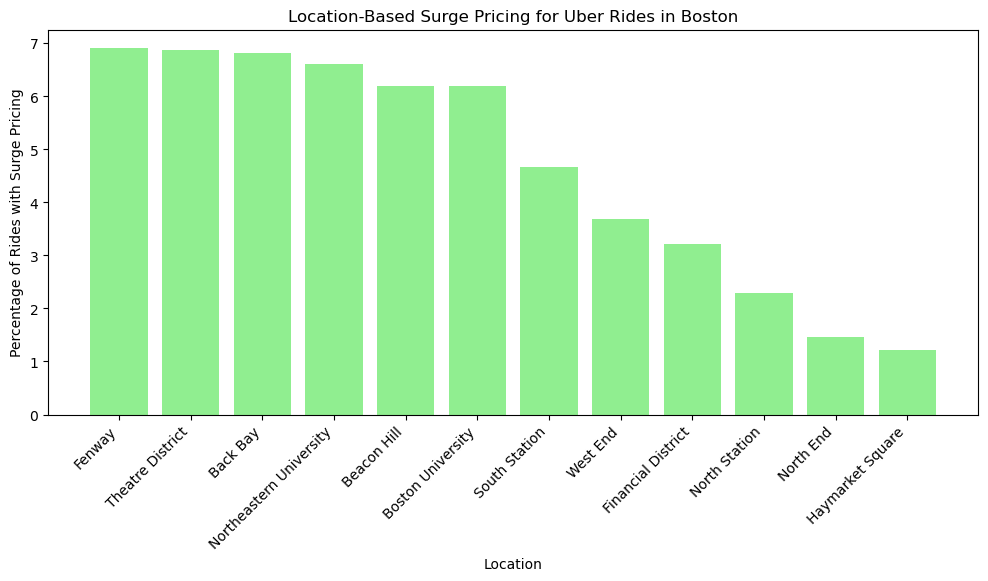

In [37]:
# Bar Chart for Location-Based Surge Pricing
plt.figure(figsize=(12, 5))
plt.bar(df1['source'], df1['percentage_with_surge'], color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Percentage of Rides with Surge Pricing')
plt.title('Location-Based Surge Pricing for Uber Rides in Boston')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights:** We can infer from this graph that the locations towards the left suffer from larger supply issues

### Step 4: Create a graph to see the locations and hours where surge is most frequent/severe

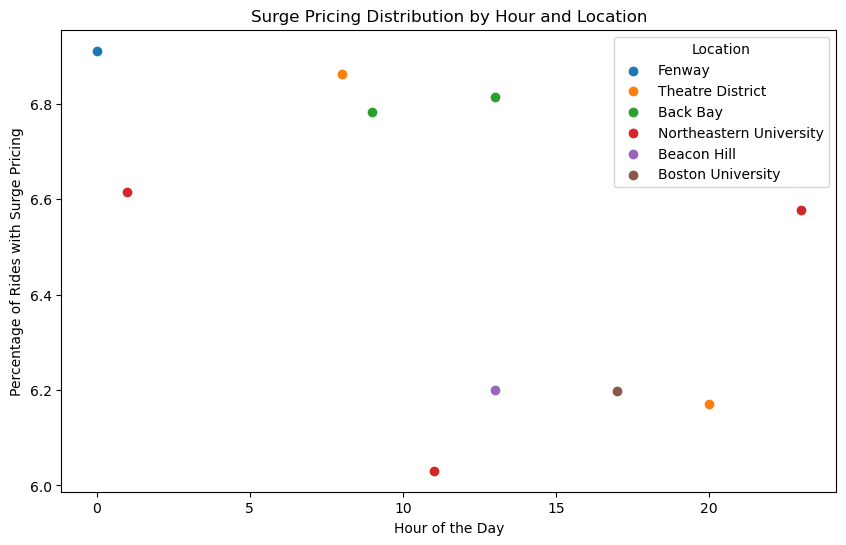

In [38]:
top_10 = df1[:10]
# Scatter Plot for Surge Pricing Distribution
plt.figure(figsize=(10, 6))
for location in top_10['source'].unique():
    subset = top_10[top_10['source'] == location]
    plt.scatter(subset['hour'], subset['percentage_with_surge'], label=location)

plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Rides with Surge Pricing')
plt.title('Surge Pricing Distribution by Hour and Location')
plt.legend(title='Location')
plt.show()

### Step 5: Insights from graph 
**From this visualization, we are able to sucessfully get insights into our question to see the times which locations suffer most from a lack of supply**

1. Fenway (Hour 0) – 6.91%:

Late-night activity in Fenway leads to the highest percentage of surge rides, possibly driven by events, nightlife, or after-game crowds.

2. Theatre District (Hour 8) – 6.86%:

Morning demand likely comes from commuters or early event attendees, resulting in a high percentage of surge pricing.

3. Back Bay (Hours 13 and 9) – 6.81% and 6.78%:

Midday and morning hours in Back Bay show significant surge percentages, potentially due to business professionals or shoppers creating high demand.

4. Northeastern University (Hours 1 and 23) – 6.61% and 6.57%:

Late-night surge pricing around Northeastern University may reflect student activity, events, or reduced driver availability.

5. Beacon Hill (Hour 13) – 6.20%:

Midday demand in Beacon Hill might result from professionals returning from lunch or errands, coupled with insufficient driver supply.

6. Boston University (Hour 17) – 6.20%:

The evening surge around Boston University may be linked to students or faculty commuting or engaging in social or academic events, and workers commuting back home.

7. Theatre District (Hour 20) – 6.17%:

Evening shows and entertainment events drive demand, causing frequent surge pricing and additional workers going home after happy hour.

8. Northeastern University (Hour 11) – 6.03%:

Late morning surge at Northeastern University might result from students and visitors heading to classes or nearby attractions.

### Step 6: Business recommendation
**Business Insight:** Surge pricing isn't a good thing for rideshare companies. It means they are not able to capture all the demand that they can profitably catch if they had sufficent drivers available. We recommend Uber and Lyft to explore options and programs like offering drivers guarenteed earnings if they will go online and be available at these specificed locations in the peak hours. For example, if they know there is a baseball game occuring in Fenway at a certain date/time, they could proactively ask riders to be available in that area during that time in exchange for guarenteed earnings.

## Business Question 2: What is the most popular ride type (e.g., luxury, shared, etc.) in each specific location, and how can this insight be used to design targeted promotion strategies?

This question aims to determine the most popular ride types in each specific location. The information gained would inform strategies for promoting certain ride types in targeted areas to optimize demand. The query analyzes the data to identify the locations (source) and ride type (drt.name) where number of rides (total_rides) is the highest. The results are sorted by the locations (source) and ride type (drt.name).

### Step 1: Query to get a breakdown of the counts of ride types in each location and their average price

In [39]:
%%sql popular_ride <<
SELECT 
    drt.name AS ride_type,
    dl.source,
    COUNT(fr.id) AS total_rides,
    AVG(fr.price) AS avg_price
FROM fact_rides fr
JOIN dim_ride_type drt ON fr.dim_cab_id = drt.id
JOIN dim_location dl ON fr.dim_location_id = dl.id
GROUP BY dl.source,drt.name
ORDER BY dl.source, total_rides DESC;

Running query in 'postgresql://postgres@/final1'

156 rows affected.

In [40]:
popular_ride

ride_type,source,total_rides,avg_price
WAV,Back Bay,3029,9.731924727632881
Black SUV,Back Bay,3012,29.40554448871182
UberXL,Back Bay,3006,15.467564870259482
Taxi,Back Bay,2990,0.0
UberPool,Back Bay,2989,9.002676480428237
UberX,Back Bay,2984,9.76005361930295
Black,Back Bay,2978,19.986568166554736
Shared,Back Bay,2843,5.76679563841013
Lux,Back Bay,2819,16.86874778290174
Lyft,Back Bay,2803,9.127891544773457


### Step 2: Create a heatmap of location vs ride type

In [41]:
# Convert the SQL result to a DataFrame
df3 = popular_ride.DataFrame()

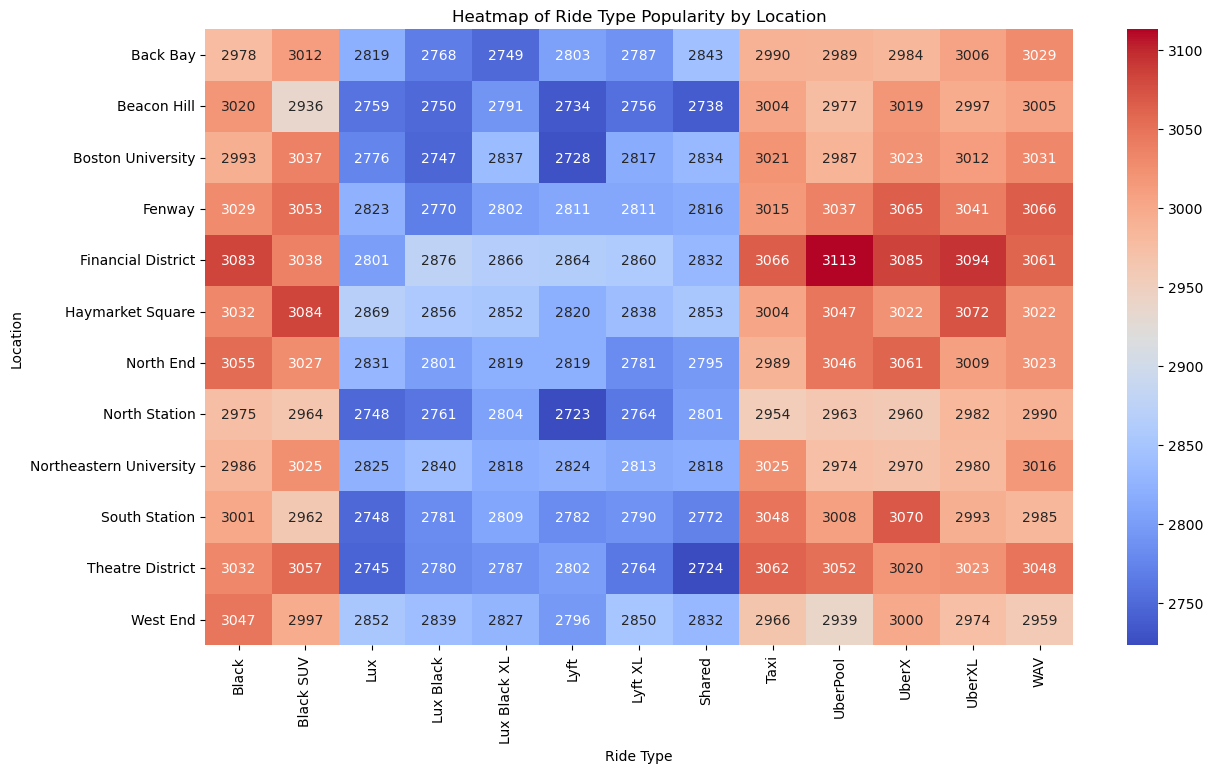

In [42]:
# Create a pivot table for the heatmap
pivot_df = df3.pivot(index='source', columns='ride_type', values='total_rides').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap='coolwarm')
plt.xlabel('Ride Type')
plt.ylabel('Location')
plt.title('Heatmap of Ride Type Popularity by Location')
plt.show()

### Step 3: Interpret heatmap

**1. Back Bay**

**Most Popular Uber Ride Type: WAV (3,029 rides)**
                                 
WAV services cater to accessibility needs, suggesting significant demand for accessible rides in this area.
                                                                        
**Most Popular Lyft Ride Type: Lux (2,819 rides)**
                                            
Lux suggests demand for premium and comfortable transportation, likely driven by affluent residents or business professionals. 
    
**2. Beacon Hill**

**Most Popular Uber Ride Type: Black (3,020 rides)**

The demand for Black rides demonstrates a strong inclination towards premium, private transportation among the affluent population  

**Most Popular Lyft Ride Type: Lux Black XL (2,791 rides)**

The demand for Lux Black XL rides demonstrates a strong inclination towards premium, private transportation among the affluent population                                             

**3. Boston University**

**Most Popular Uber Ride Type: Black SUV (3,037 rides)**
    
Higher preference for premium rides like Black SUV suggests that students, visitors, or faculty may opt for comfortable or group transportation options.

**Most Popular Lyft Ride Type: Lux Black XL (2,837 rides)**

The demand for Lux Black XL rides demonstrates a strong inclination towards premium, private transportation among the affluent population                                       

**4. Fenway**

**Most Preferred Uber Ride Type: WAV (3,066 rides)**
                                 
Demand for WAV might stem from the need for accessible transport, possibly influenced by Fenway Park events attracting diverse crowds.
    
**Most Popular Lyft Ride Type: Lux (2,823 rides)**

Lux suggests demand for premium and comfortable transportation, likely driven by affluent residents or business professionals. 
    
**5. Financial District**

**Most Popular Uber Ride Type: UberPool (3,113 rides)**
    
Shared rides are preferred, indicating cost-conscious commuters or a preference for economical transport in this busy business hub.
    
**Most Popular Lyft Ride Type: Lux Black (2,876 rides)**

Lux Black sggests demand for premium and comfortable transportation, likely driven by affluent residents or business professionals.                                         

**6. Haymarket Square**

**Most Popular Uber Ride Type: Black SUV (3,084 rides)**
                                       
A preference for Black SUV indicates a demand for luxury, possibly due to tourists or business professionals frequenting this area.
    
**Most Popular Lyft Ride Type: Lux (2,869 rides)**

Lux suggests demand for premium and comfortable transportation, likely driven by affluent residents or business professionals. 
    
**7. North End**

**Most Popular Uber Ride Type: UberX (3,061 rides)**
    
The preference for UberX reflects a balance of affordability and convenience in this residential and tourist-heavy location.
    
**Most Popular Lyft Ride Type: Lux (2,831 rides)**
    
The preference for Lux rides suggests a notable segment of users seeking premium and private transportation.
    
**8. North Station**

**Most Popular Uber Ride Type: WAV (2,990 rides)**
    
Accessible services are prioritized, likely due to travelers with mobility needs at this major transport hub.
    
**Most Popular Lyft Ride Type: Lux Black XL (2,804 rides)**
    
The demand for Lux Black XL rides demonstrates a strong inclination towards premium, private transportation among the affluent population  

**9. Northeastern University**

**Most Popular Uber Ride Type: Black SUV (3,025 rides)**

Black SUV’s popularity shows a preference for premium group rides, catering to students, faculty, and visitors.

**Most Popular Lyft Ride Type: Lux Black (2,840 rides)**
    
Lux Black sggests demand for premium and comfortable transportation, likely driven by affluent residents or business professionals.   
              
**10. South Station**

**Most Popular Uber Ride Type: UberX (3,070 rides)**
                                                                                 
Popularity of UberX suggests demand for convenient yet affordable transportation for commuters and travelers.
                                                                                
**Most Popular Lyft Ride Type: Lux Black XL (2,809 rides)** 

The demand for Lux Black XL rides demonstrates a strong inclination towards premium, private transportation among the affluent population  
                                                                              
**11. Theatre District**

**Most Popular Uber Ride Type: Taxi (3,062 rides)**
                                                                                
Taxis remain popular, potentially due to ease of availability near entertainment venues.
                                                                                
**Most Popular Lyft Ride Type: Lyft (2,802 rides)**

Lyft remains popular for its affordability and convenience, appealing to a broader audience of locals and visitors.            
    
**12. West End**
                                                                                
**MMost Popular Uber Ride Type: Black (3,047 rides)**
                                                                                
High preference for Black rides indicates demand for luxury, likely from professionals or affluent residents.
                                                                                
**Most Popular Lyft Ride Type: Lux (2,852 rides)**

The preference for Lux rides suggests a notable segment of users seeking premium and private transportation.
                                                                           

### Step 4: Business recommendation

**Business Insight:** To better align with demand patterns, increase the availability of WAV (wheelchair-accessible vehicles) in high-demand areas such as Back Bay, Fenway, North Station, and Northeastern University. These areas likely see diverse transportation needs, and improving access can enhance rider satisfaction and inclusivity. Additionally, promote Black and Black SUV services in affluent and business-focused areas like Haymarket Square and West End to capture premium customers and cater to the demand for comfort and luxury.

Further, expand shared ride options like UberPool in high-demand areas such as the Financial District to attract budget-conscious commuters who prioritize affordability. At the same time, focus on maintaining strong service availability with UberX and Lyft in residential and commuter-heavy areas like the North End and South Station. These rideshare companies could consider Implementing price promotions or subscription plans in these areas to foster rider loyalty and attract new users. These strategies can address affordability concerns while positioning rideshare services as convenient, reliable options for daily commuting and occasional trips.

## Business Question 3: Which cab type service (e.g., Lyft or Uber) offers the highest costs for riders and the greatest earning potential for drivers across different locations and how does this affect the number of rides?

This question will be investigated by calculating the average earnings per mile,the average cost, and the average distance for rides starting in each location for both Uber and for lyft.

### Step 1: Query for average earnings per mile, average cost, average distance, and total number of rides

In [43]:
%%sql cab_service <<
SELECT 
    drt.cab_type,
    dl.source,
    AVG(fr.price / fr.distance) AS avg_earnings_per_mile,
    AVG(fr.price) AS avg_cost,
    AVG(fr.distance) AS avg_distance,
    COUNT(fr.id) AS total_rides
FROM fact_rides fr
JOIN dim_ride_type drt ON fr.dim_cab_id = drt.id
JOIN dim_location dl ON fr.dim_location_id = dl.id
GROUP BY dl.source,drt.cab_type
ORDER BY dl.source;

Running query in 'postgresql://postgres@/final1'

24 rows affected.

In [44]:
cab_service

cab_type,source,avg_earnings_per_mile,avg_cost,avg_distance,total_rides
Lyft,Back Bay,9.798236040801125,16.51284691991174,1.7994811855208852,16769
Uber,Back Bay,8.252726176391246,13.345530779493044,2.155252525252548,20988
Lyft,Beacon Hill,8.27624184194016,16.454743465634074,2.0587475798644808,16528
Uber,Beacon Hill,6.655672144203361,12.807424372554634,2.019313865826891,20958
Lyft,Boston University,6.857024117122509,20.05788876276958,3.0584449489216703,16739
Uber,Boston University,6.627472709803196,15.181268953752843,3.036791129643758,21104
Lyft,Fenway,7.2847461558868885,19.649943563238875,2.827064694350359,16833
Uber,Fenway,5.543553826303269,14.761334835257674,2.80996761475629,21306
Lyft,Financial District,11.750015195491175,18.80015205567577,2.6239826890461746,17099
Uber,Financial District,9.866453410197474,15.093918291550603,2.795974930361904,21540


### Step 2: Create a heatmap to see average cost by location and cab type

In [45]:
# Convert the SQL result to a DataFrame
df4 = cab_service.DataFrame()

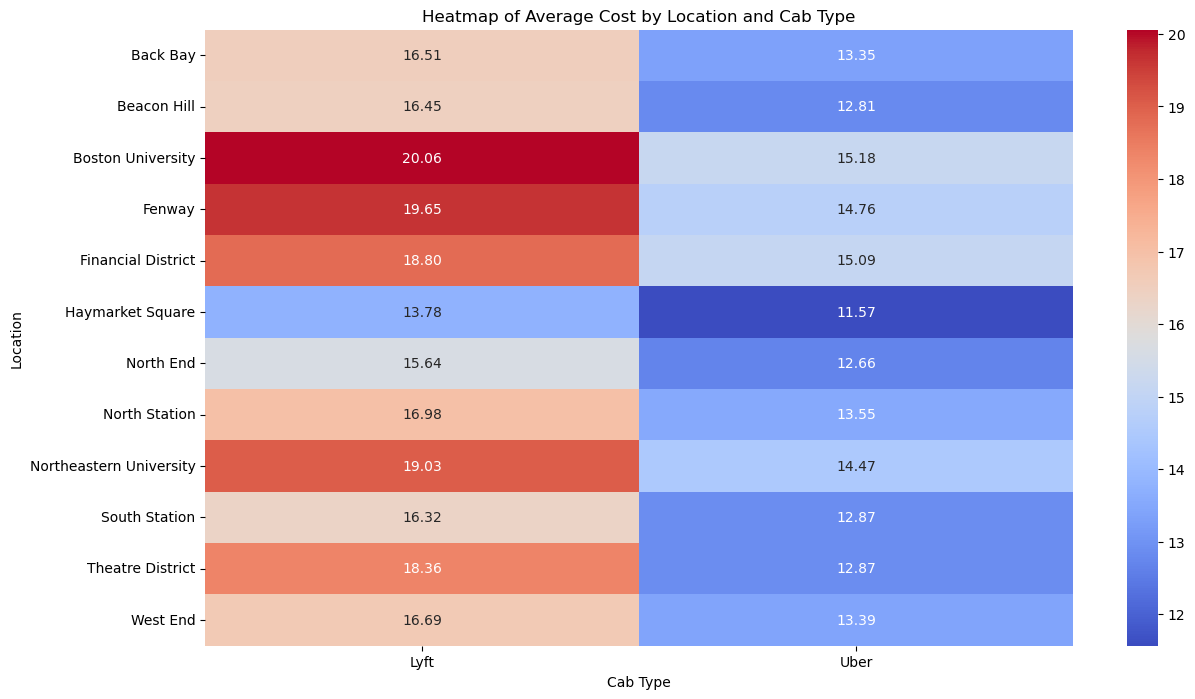

In [46]:
# Create a pivot table for the heatmap
pivot_df = df4.pivot(index='source', columns='cab_type', values='avg_cost').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.xlabel('Cab Type')
plt.ylabel('Location')
plt.title('Heatmap of Average Cost by Location and Cab Type')
plt.show("This visualization shows hotspots for high costs and earnings between Uber and Lyft.")

### Step 3: Create a bar graph to see average ride cost vs average earning per mile in each location

/tmp/ipykernel_1875/912505057.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df4['source'], rotation=45)


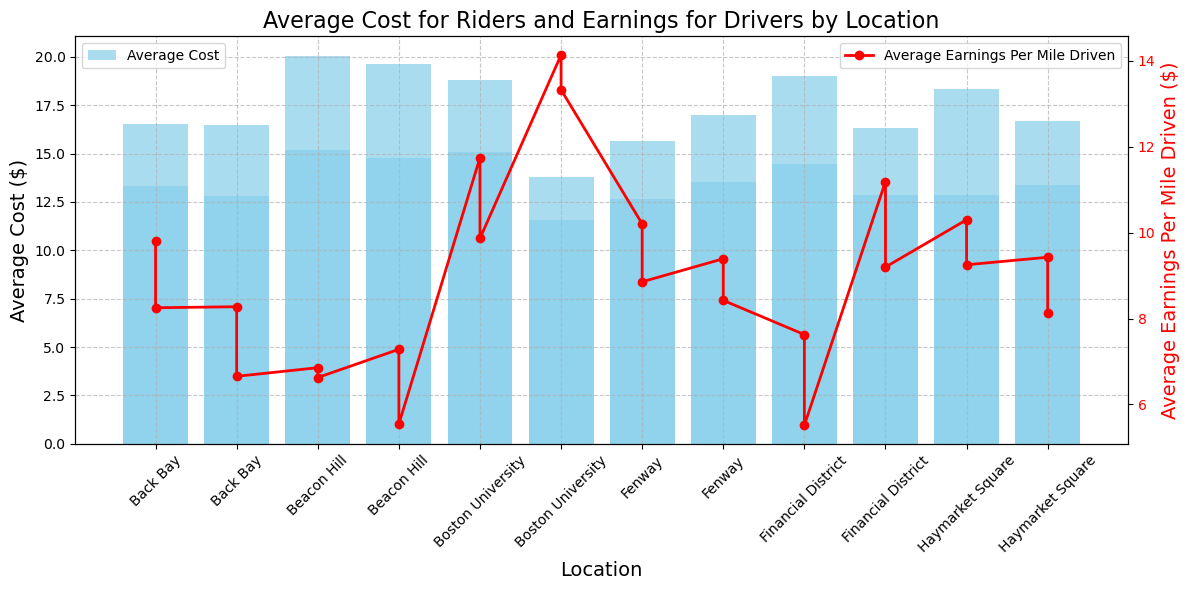

This visualization shows the average cost for riders and and greatest earning potential for drivers across different locations.


In [47]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average cost
ax1.bar(df4['source'], df4['avg_cost'], color='skyblue', alpha=0.7, label='Average Cost')
ax1.set_xlabel('Location', fontsize=14)
ax1.set_ylabel('Average Cost ($)', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(df4['source'], rotation=45)

# Create a second y-axis for average earnings
ax2 = ax1.twinx()
ax2.plot(df4['source'], df4['avg_earnings_per_mile'], color='red', marker='o', linewidth=2, label='Average Earnings Per Mile Driven')
ax2.set_ylabel('Average Earnings Per Mile Driven ($)', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and legends
plt.title('Average Cost for Riders and Earnings for Drivers by Location', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add grid for readability
ax1.grid(True, linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()
plt.show()

print("This visualization shows the average cost for riders and and greatest earning potential for drivers across different locations.")

**Insight:** While Lyft drivers earn more per mile and charge higher fares, Uber maintains higher total ride counts. This suggests that price affordability may lead to higher demand for Uber, even though Lyft drivers earn better per mile. 


### Step 4: Business recommendation
   
**Business Insight:** Based on the analysis, Lyft should focus on emphasizing its value by highlighting superior ride quality, shorter wait times, and reliability—particularly in high-demand areas like the Financial District, Haymarket Square, Fenway, and North Station. 
Enhancing wait times, service response, and user satisfaction will justify its premium fares and build long-term customer loyalty. Strengthening competitive strategies through partnerships, promotions, and unique value offers (e.g., loyalty programs or exclusive ride options) will allow Lyft to differentiate itself further from Uber.
Additionally, implementing flexible driver incentives—such as bonuses for high-performing areas, loyalty rewards, and earnings-per-mile programs—will ensure drivers are motivated and adequately deployed during peak demand.
Targeting affluent riders and business trips through strategic marketing is also recommended. 